# THE NETWORK OF CO-OCCURRING KEYWORDS
# (NAMES AND TOPIC MODELING TERMS)
# IN SENTENCES OF BRAM STOKER'S "DRACULA"

## By Moses Boudourides

### NYU Abu Dhabi Winter Institute in Digital Humanities (19-22 January 2020)
### Tutorial on Digital Humanities/Social Sciences with Jupyter Notebooks

#### Lauren Klein's Intro to Jupyter Notebook and Python Crash Course
https://github.com/laurenfklein/feminist-data-science/blob/master/notebooks/hw0-jupyter-intro.ipynb

In [1]:
import os
import random, operator, re, string, copy, dateutil.parser, itertools, pickle, datetime, math, pandas as pd, numpy as np, matplotlib.pyplot as plt, networkx as nx, community
# import pygraphviz
np.random.seed(2018)
from collections import Counter
# from networkx.drawing.nx_agraph import graphviz_layout
from string import punctuation, digits
import nltk
# nltk.download('wordnet')
from nltk.stem.porter import *
stemmer = PorterStemmer()
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet as wn
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from textblob import TextBlob
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from gensim.corpora import Dictionary
import pyLDAvis
from pyLDAvis import gensim as pgensim
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
import seaborn as sns
import codecs
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.simplefilter('ignore')

In [2]:
stop_words = stopwords.words('english') #+ list(punctuation) 
stop_words_C=[s.title() for s in stop_words]
stop_words_CC=[w.replace(w[-1],w[-1].lower()) for w in stop_words_C if len(w)>1]+[w for w in stop_words_C if len(w)==1]

def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [w for w in words if w not in stop_words and not w.isdigit()] 
 
def tokenize_C(text):
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words_CC and not w.isdigit()] 

### Load Data

In [3]:
# Source:
# url = "http://www.gutenberg.org/cache/epub/345/pg345.txt"
filename  = "Stoker_Dracula.txt"
f = codecs.open(filename, "r", encoding="utf-8").readlines()
# f = urllib.request.urlopen(url).read().decode()
for line in f:
    if line.startswith("(_Kept in shorthand._)"):
        print(f.index(line)) #198
    if line.startswith("                                THE END"):
        print(f.index(line)) #15514
f=f[194:15514]
text=[]
text="\n".join(f).split("CHAPTER")[1:]
print(type(text),len(text))
# print(text[0])

198
15514
<class 'list'> 27


In [4]:
docs_d={}
for i,j in enumerate(text):
    docs_d["Chapter"+str(i+1)]="CHAPTER "+j.replace("\n\n\n\n"," ").replace("\n\n\n"," ").replace("\n\n"," ").replace("\n"," ")
print(len(docs_d))
docs=list(docs_d.values())
print(len(docs))
print("This is the beginning of the first document (first chapter):")
list(docs)[5][:1000]

27
27
This is the beginning of the first document (first chapter):


'CHAPTER  VI MINA MURRAY\'S JOURNAL  _24 July. Whitby._--Lucy met me at the station, looking sweeter and lovelier than ever, and we drove up to the house at the Crescent in which they have rooms. This is a lovely place. The little river, the Esk, runs through a deep valley, which broadens out as it comes near the harbour. A great viaduct runs across, with high piers, through which the view seems somehow further away than it really is. The valley is beautifully green, and it is so steep that when you are on the high land on either side you look right across it, unless you are near enough to see down. The houses of the old town--the side away from us--are all red-roofed, and seem piled up one over the other anyhow, like the pictures we see of Nuremberg. Right over the town is the ruin of Whitby Abbey, which was sacked by the Danes, and which is the scene of part of "Marmion," where the girl was built up in the wall. It is a most noble ruin, of immense size, and full of beautiful and roma

In [5]:
titlename = "Bram Stoker's Dracula"
# num_lines = 0
# num_words = 0
# num_chars = 0
# for line in f:
#     words = line.split()
#     num_lines += 1
#     num_words += len(words)
#     num_chars += len(line)
# print("%shas number of words = %i (and number of characters/symbols = %i)" %(titlename,num_words,num_chars))
tdocs=" ".join(docs)
blob = TextBlob(tdocs)
words = word_tokenize(tdocs)
nuw=len(words)
uw=len(set(words))
print("%s contains %i nonunique and %i unique words"%(titlename,nuw,uw))

Bram Stoker's Dracula contains 189767 nonunique and 10578 unique words


### Extraction of Proper Nouns

In [6]:
def findPeople(tree, people):
    if type(tree) is nltk.tree.Tree and tree.label() == "PERSON":
        people.append(" ".join([word for word, pos in tree]))
    elif (type(tree) is nltk.tree.Tree) or (type(tree) is list):
        [findPeople(branch, people) for branch in tree]

In [7]:
# ### The following code is run in 47.72 seconds (0.80 minutes)

# import time
# start_time = time.clock()
# multi_people = []
# sentences = nltk.sent_tokenize(tdocs)
# tokenizedSentences = [nltk.word_tokenize(sent) for sent in sentences]
# taggedSentences = [nltk.pos_tag(sent) for sent in tokenizedSentences]
# chunkedSentences = [nltk.ne_chunk(sent) for sent in taggedSentences]
# people = []
# findPeople(chunkedSentences, people)
# people = [re.sub("(Mr\.|Miss)", "", person) for person in people]
# people = [person.strip() for person in people if person.strip()] 
# people = set(people)
# names=[]
# if len(people) > 1:
#     multi_people.append(people)
# for p in multi_people:
#     for pp in p:
#         if "_" not in pp:
#             names.append(pp)
# names = [w for w in list(names) if w.lower() not in stop_words and w not in list(punctuation) and w.startswith("'")==False]
# names = [x for x in names if not any(c.isdigit() for c in x)]
# names = [x for x in names if x not in ['--','...','A.']]
# names = [x for x in names if nltk.pos_tag(x)[0][1] not in ['VBN','VB','VBD','VBG','VBP','VBZ']]
# names = [x for x in names if x.islower()==False]
# names = [x for x in names if len(x)>2]
# rems=['I',"II","III","IV","V","VI","VII","VIII","IX","X",'XI',"XII","XIII","XIV","XV","XVI","XVII",
#       "Mr.","Mrs.","Miss","Dr.","DR.","Even","Found","Friend","Great","Good","Honest","Husband","International",
#       'ANOTHER', 
#       'CHILD',"Herr","Herren","Left","Come","Directory","Lord","Messrs.","God","End","New","Mon","Far","Real",
#      "Recording","Red","Poor","Sir","Sister","Somehow","Street","Tell","To-day","To-night","Visited","XIX","XVIII",
#       "XXI",
#      "XXII","XXIII","XXIV","XXV","XXVI","XXVII","Dear","Angel","Dame","English","Evil","Four","Nations",
#      "Guide","Constitutional","Horror","Sea","Master","Survey","St.","Woman","West","Vice",
#      "Doctor","Seward","John","Brave","Breakfast","Church","Count","Dracula","Crew","Cross","Dare","Death",
#      "Denn",'Despair','Devil','Dinner',"Domine","Dun","Flick","Guard","Hark","Hon","Lor","Love",'Madam',
#      'Mate','Mein','Merciful','Mother','Navy Lists','Old','Please',"Poter",'Quick','Son','Sorry','Ste',
#       'Strange','Sunset','Woe','Ugly Duck','Traveller','Till',"Arminus","Fancy","Art","Great Scott",
#      'Virgin','Thank God','Sons','Solicitor','Seemed','Professor','Orange Master','Moneybag','Mein Gott',
#      'Kingdom Come','Issue']
# names = [x for x in names if "_" not in x]
# names = [x for x in names if x not in rems]
# remss=[]
# for n in names:
#     for m in names:
#         if m!=n:
#             if m in n:
#                 remss.append(n)
# #     for r in rems:
# #         if r in n:
# #             remss.append(n)
# names = [x for x in names if x not in remss]            
# names = [x.title() for x in names]
# names = list(set(names))

# tdocs=" ".join(docs)
# namesg=[]
# for i in itertools.product(names,names):
#     w=i[0]+" "+i[1]
#     if w in tdocs:
#         namesg.append(w)

# names+=[x for x in namesg if x not in ['Harker Jonathan','Morris Quincey']]
# outt=['Abraham Van',"Abraham Van Helsing","Art",'Arminus','Quincey','Thomas',"Mina","Murray",'Wilhelmina','Harker','Jonathan',
#      'Jack','Arthur Holmwood',"Alley","Helsing","Morris","Lucy","Helsing",'Surgeon J.']
# names=[x for x in names if x not in outt]
# names+=['Van Helsing','Surgeon J. M. Caffyn']
# names=list(set(names))

# print("Run in %.2f seconds (%.2f minutes)" %(time.clock() - start_time,(time.clock() - start_time)/60))
# # #       time.clock() - start_time, "seconds", (time.clock() - start_time)/60, "minutes")
# # pvw=100*len(names)/uw
# # # print(len(vocabulary_PN),uw,len(vocabulary_PN)/uw,pvw)
# # print("The capitalized %s words vocabulary contains %i words"%(titlename,len(names))) 
# # print("i.e., %.2f%% of total unique words" %pvw)

In [8]:
# with open('pnames.pkl', 'wb') as f:
#     pickle.dump(names, f)

with open('pnames.pkl', 'rb') as f:
    names= pickle.load(f)

# names=[x for x in names if x!=]

pvw=100*len(names)/uw
print("The %s vocabulary of names contains %i names"%(titlename,len(names))) 
print("i.e., %.2f%% of total unique words" %pvw)
sorted(names)

The Bram Stoker's Dracula vocabulary of names contains 132 names
i.e., 1.25% of total unique words


['Abramoff',
 'Africa',
 'Almanac',
 'Almighty God',
 'Amsterdam',
 'Andres',
 'Andrew Woodhouse',
 'Antwerp',
 'Archibald',
 'Archimedes',
 'Arlington Street',
 'Arminius',
 'Arpad',
 'Arthur',
 'Attila',
 'Bartel Street',
 'Berkeley Hotel',
 'Bermondsey',
 'Bersicker',
 'Bilder',
 'Billington',
 'Bistritz',
 'Bloofer Lady',
 'Bloxam',
 'Borgo Prund',
 'Bradshaw',
 'Byron',
 'Charcot',
 'Churchman',
 'Corcoran',
 'Count Dracula',
 'Cszeks',
 'Dame Nature',
 'Danube',
 'De Ville',
 'Disraeli',
 'Donelson',
 'Edward Spencelagh',
 'Ellen Terry',
 'Enoch',
 'Exeter',
 'Fenchurch Street',
 'Ferrier',
 'Gabriel',
 'Geordie',
 'George',
 'German',
 'Gibralter',
 'Godalming',
 'Golden Mediasch',
 'Great Northern Railway',
 'Great Walworth',
 'Guide Court',
 'Guiliano',
 'Hardy',
 'Harwich',
 'Hawkins',
 'Hennessey',
 'Herr Leutner',
 'Herren Klopstock',
 'Hildesheim',
 'Hill',
 'Holmwood',
 'Hull',
 'Hyde Park Corner',
 'Icelander',
 'Jack Smollet',
 'Jamrach',
 'John Paxton',
 'John Rawlings

In [9]:
tdocs=" ".join(docs)

nfreq=[]
for i in names: 
    nfreq.append(tdocs.count(i))
pnf_df = pd.DataFrame(
    {'Names': names, 
     'Frequency of Occurrences': nfreq
    })
pnf_df=pnf_df[['Names','Frequency of Occurrences']]
pnf_df=pnf_df.sort_values(by ='Frequency of Occurrences',ascending=False)
# trf_df=trf_df[trf_df["Frequency of Occurrences"]>10]
print(len(pnf_df))
pnf_df[:50]

132


,Names,Frequency of Occurrences
82,Van Helsing,316
117,Arthur,169
34,Godalming,88
99,Renfield,48
86,Westenra,45
100,Whitby,43
46,Hawkins,25
69,Quincey Morris,24
77,Piccadilly,23
92,Slovak,21


In [10]:
pnf_df.to_csv('properNouns_freqs.csv')

### Extraction of Terms from Topic Modeling

In [11]:
vocabulary = set()
for i in docs:
    words = tokenize(i)
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(docs)
 
print(VOCABULARY_SIZE, DOCUMENTS_COUNT)  #All: 9741 27

9754 27


In [12]:
# def lemmatize_stemming(text):
#     return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
#             result.append(lemmatize_stemming(token))
    return result

In [13]:
# documents=docs
# doc_sample = list(documents)[0]
# # print('original document: ')
# words = []
# for word in doc_sample.split(' '):
#     words.append(word)
# # print(words)
# # print('\n\n tokenized and lemmatized document: ')
# # print(preprocess(doc_sample))

In [14]:
# rd={}
# pdocs=[preprocess(doc) for doc in documents]
# ppdocs=[]
# for s in pdocs:
#     for i in range(len(s)):
#         for k in rd.keys():  #,v in rd.items():
#             if k == s[i]:
#                 s[i]=rd[k]
#     ppdocs.append(s)

In [15]:
excl=[u'ere',u'ye',u'wouldn',u'madam',u'happened']
# processed_docs = ppdocs #[preprocess(doc) for doc in documents]
processed_docs = [preprocess(doc) for doc in docs]
processed_docs1=[]
for x in processed_docs:
    y=[]
    for xx in x:
        if xx not in excl:
            y.append(xx)
    processed_docs1.append(y)
processed_docs=processed_docs1
allw=[]
for x in processed_docs:
    for xx in x:
        if xx not in allw:
            allw.append(xx)
print(len(allw)) #All 5752
# processed_docs[:10]

8601


In [16]:
allws=[]
for z in processed_docs:
    for zz in z:
        allws.append(zz)
print(len(allws),len(set(allws)))
# sorted(allws)
allwd=Counter(allws)
print(len(allwd))
# for p,q in allwd.items():
#     print(p,q)
# count = 0
# for k in sorted(allwd.keys()):
#     print(k)
#     count += 1
#     if count > 50:
#         break

54136 8601
8601


In [17]:
dictionary = gensim.corpora.Dictionary(processed_docs)
print(len(dictionary)) #All 32368
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

8601
0 able
1 abreast
2 absence
3 accustomed
4 added
5 affected
6 afield
7 afraid
8 afternoon
9 agonised
10 ahead


In [18]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=300)
#                            keep_n=100000) #3 0.7 | 15 0.5
len(dictionary) #All 15838 [2: 10955 with keep_n=100000]

300

In [19]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# bow_corpus[43]

In [20]:
nt=3 #number_of_topics
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=nt, id2word=dictionary, passes=2, workers=2)

In [21]:
topics = lda_model.print_topics(num_words=100) #350

terms=[]
lt=[]
for i in range(nt):
    for t in topics: 
        lt.append(t[1].split(" + "))
import re
for s in lt:
    for ss in s:
        terms.append(ss[6:])
#         if re.sub(r'[^a-zA-Z]','', ss) not in terms:
#             terms.append(re.sub(r'[^a-zA-Z]','', ss))
terms=[t.replace('"',"") for t in terms]
terms=sorted(set(terms))
print(len(terms))
print(" ")
print("LIST OF TM TERMS:")
print(" ")
for i in terms:
    print(i)

199
 
LIST OF TM TERMS:
 
accept
action
alas
anxiety
anxious
arrived
asking
attack
beat
beauty
begun
belief
bound
boxes
breakfast
breath
bright
broke
business
carefully
carfax
carriage
carried
castle
catch
caught
cheeks
cheerful
children
church
clear
clever
clouds
complete
confidence
corner
courage
covered
crucifix
darkness
dawn
delay
died
dracula
drawn
dreams
drove
dust
dying
east
edge
energy
enter
evident
evil
exactly
exeter
facts
fail
faint
fair
faith
fall
fallen
falling
fast
father
fierce
finally
fingers
finished
flame
flesh
floor
following
forget
forward
free
garlic
gently
ghastly
glass
gloom
gravely
greater
green
grey
guess
hair
hall
harm
hell
horrible
howling
intent
iron
journey
kill
kissed
knowing
laugh
line
lives
locked
longer
looks
loved
makes
mass
matters
meant
meeting
minute
monster
moonlight
mother
movement
nearly
necessary
news
noble
nodded
noon
nose
noticed
opportunity
paper
papers
passage
passing
passion
paused
peace
post
prepared
presently
pulled
questions
record
relie

In [22]:
sss=[]
for idx, topic in lda_model.print_topics(-1):
    tt=[]
    s=topic.split(" + ")
    ss=[]
    uu=[]
    for t in s:
        u0=float(t.split("*")[0])
        u1=t.split("*")[1].replace('"','')
        if (u1,u0) not in ss:
            ss.append((u1,u0))
        if t not in uu:
            uu.append(t) 
    sss.append(ss)
    topic=" + ".join(uu).encode('utf-8')
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: b'0.014*"boxes" + 0.010*"wolves" + 0.009*"renfield" + 0.009*"hall" + 0.009*"tomb" + 0.008*"river" + 0.008*"forward" + 0.008*"tired" + 0.008*"dust" + 0.008*"castle"'
Topic: 1 
Words: b'0.013*"castle" + 0.010*"renfield" + 0.010*"wind" + 0.008*"boxes" + 0.008*"dracula" + 0.008*"papers" + 0.007*"laugh" + 0.007*"seat" + 0.007*"forget" + 0.007*"loved"'
Topic: 2 
Words: b'0.025*"september" + 0.018*"westenra" + 0.017*"mother" + 0.011*"satisfied" + 0.011*"anxious" + 0.010*"table" + 0.009*"papers" + 0.009*"wolves" + 0.008*"tomb" + 0.008*"questions"'


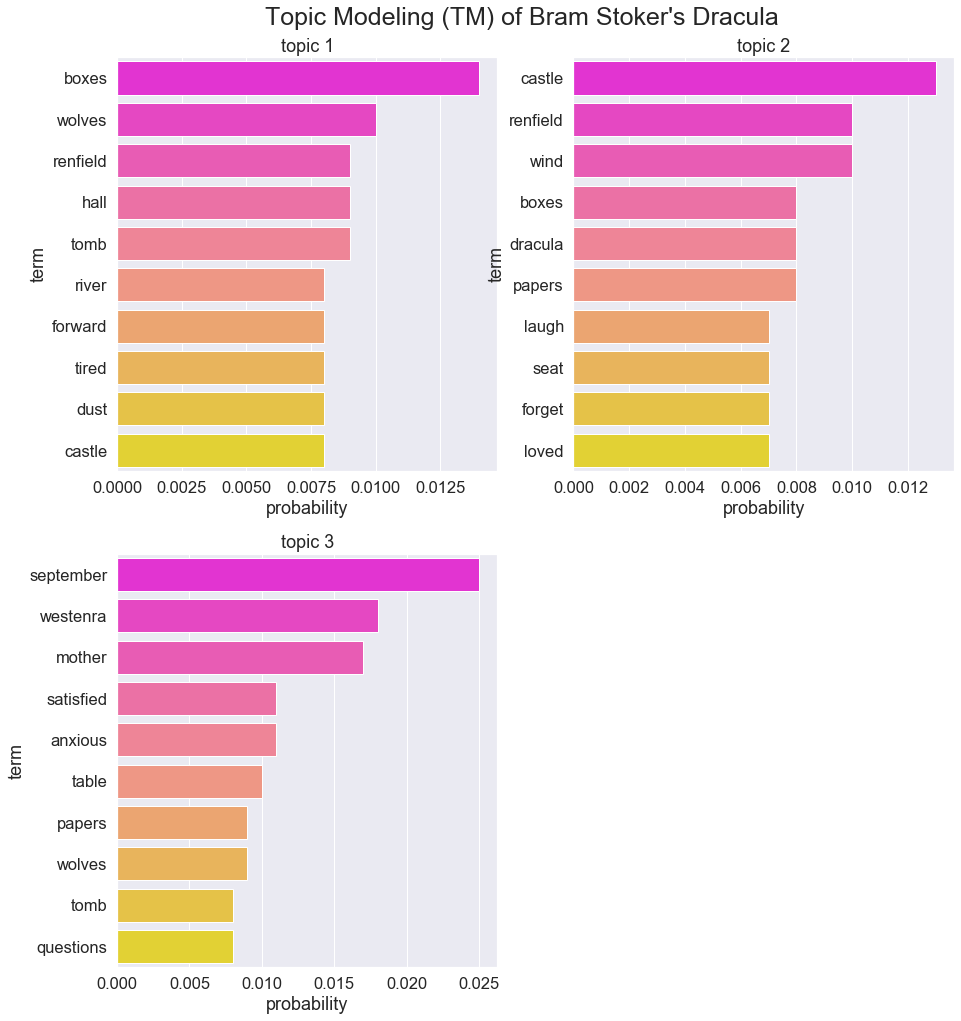

In [23]:
plt.figure(figsize=(15,35)) #figsize=(15,2.4*15*((nt+1)/4))); #15
for i in range(nt):
    sns.set(font_scale = 1.5)
    df=pd.DataFrame(sss[i], columns=['term','prob']).set_index('term')
    plt.subplot(nt+1,2,i+1); #5
    plt.title('topic '+str(i+1));
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='spring');
    plt.xlabel('probability');
sst="Topic Modeling (TM) of %s" %titlename
plt.suptitle(sst,fontsize=25, y=0.90);
plt.show()

In [24]:
from pyLDAvis import gensim as pgensim
vis = pgensim.prepare(lda_model,bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.012731 -0.013939       1        1  42.819206
0     -0.023046  0.011495       2        1  34.812904
2      0.035777  0.002444       3        1  22.367889, topic_info=    Category       Freq       Term      Total  loglift  logprob
278  Default  53.000000  september  53.000000  30.0000  30.0000
281  Default  42.000000   westenra  42.000000  29.0000  29.0000
80   Default  48.000000     mother  48.000000  28.0000  28.0000
242  Default  23.000000  satisfied  23.000000  27.0000  27.0000
283  Default  27.000000    anxious  27.000000  26.0000  26.0000
..       ...        ...        ...        ...      ...      ...
112   Topic3   7.720909     smiled  23.637657   0.3786  -5.0883
172   Topic3   7.579997      glass  23.632973   0.3604  -5.1068
40    Topic3   6.649676       fail  18.923607   0.4517  -5.2377
131   Topic3   6.748515      trees  23.678001   0.2423  -5.2229
208   Topic3   6.705009    telling  23.629387   0.2379  -5.2294

[161 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
297       1  0.188230  accept
297       2  0.313716  accept
297       3  0.501946  accept
250       1  0.592055  action
250       2  0.273256  action
...     ...       ...     ...
138       2  0.427484  wolves
138       3  0.247491  wolves
139       1  0.444941   worse
139       2  0.166853   worse
139       3  0.389324   worse

[342 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [25]:
ted={}
for k,v in docs_d.items():
    t=[]
    for w in terms: 
        if w in v:
            if w not in t:
                t.append(w)
    ted[k]=sorted(t)
print(len(ted))
# for k,v in ted.items():
#     print k,v

27


In [26]:
freq=[]
for k in terms: 
    for kk,v in allwd.items():
        if kk==k:
            freq.append(v)
trf_df = pd.DataFrame(
    {'Term': terms, 
     'Frequency of Occurrences': freq
    })
trf_df=trf_df[['Term','Frequency of Occurrences']]
trf_df=trf_df.sort_values(by ='Frequency of Occurrences',ascending=False)
trf_df=trf_df[trf_df["Frequency of Occurrences"]>10]
print(len(trf_df))
trf_df[:30]

199


,Term,Frequency of Occurrences
156,september,56
115,mother,51
13,boxes,51
23,castle,51
140,renfield,48
194,wolves,46
190,westenra,44
191,wind,44
127,papers,38
180,tomb,36


In [27]:
trf_df.to_csv('terms_freqs.csv')

In [28]:
tterms=sorted(set(terms+trf_df['Term'].tolist()[:70]))
tterms=tterms+names
print(len(tterms))
# print(tterms==terms)
# print
# print "LIST OF TM TERMS"
# print
# for i in sorted(tterms):
#     print i

331


### The graph of co-occurrent Names and TM terms

In [29]:
# medges=[]
# for k,v in docs_d.items():
#     sent_text = nltk.sent_tokenize(v)
#     for sent in sent_text:
#         for j in itertools.combinations(tterms, 2):
#             if j[0] in sent and j[1] in sent:
#                 medges.append((j[0],j[1],k))
# print(len(medges),len(set(medges)))
# # medges

In [30]:
# with open('medges.pkl', 'wb') as f:
#     pickle.dump(medges, f)

with open('medges.pkl', 'rb') as f:
    medges= pickle.load(f)
    
print(len(medges),len(set(medges)))
# medges

4714 4301


In [31]:
G = nx.MultiGraph()
G.add_edges_from(medges)

weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)

pnn=[x for x in list(Gw.nodes()) if x in names]
trn=[x for x in list(Gw.nodes()) if x not in names]
# print(len(pnn),len(trn))

sst="The graph of co-occurrent names and TM terms in %s" %titlename
print(sst, "has",len(Gw), "nodes and",len(Gw.edges()),"edges")
print("among the nodes",len(pnn),"nodes are names and",len(trn),"nodes are terms")

ncc=nx.number_connected_components(Gw)
if nx.is_connected(Gw)==True:
    print ("This graph is connected")
else:
    print ("This graph is not connected and has", ncc, "connected components")
Gl = sorted(nx.connected_component_subgraphs(Gw), key = len, reverse=True)
Gc=Gw.subgraph(Gl[0])
pnnl=[x for x in list(Gc.nodes()) if x in names]
trnl=[x for x in list(Gc.nodes()) if x not in names]
print ('The largest connected component has:')
print ("%i nodes and %i edges" %(len(Gc.nodes()), len(Gc.edges())))
print("among the nodes of the largest connected component",len(pnnl),"nodes are names and",len(trnl),"nodes are terms")
Gs1=Gw.subgraph(Gl[1])
Gs2=Gw.subgraph(Gl[2])
print("The remaining two connected components are the following two dyads:")
print(list(Gs1.nodes()))
print(list(Gs2.nodes()))

The graph of co-occurrent names and TM terms in Bram Stoker's Dracula has 305 nodes and 3294 edges
among the nodes 112 nodes are names and 193 nodes are terms
This graph is not connected and has 3 connected components
The largest connected component has:
301 nodes and 3292 edges
among the nodes of the largest connected component 108 nodes are names and 193 nodes are terms
The remaining two connected components are the following two dyads:
['Whitaker', 'Almanac']
['Edward Spencelagh', 'Andres']


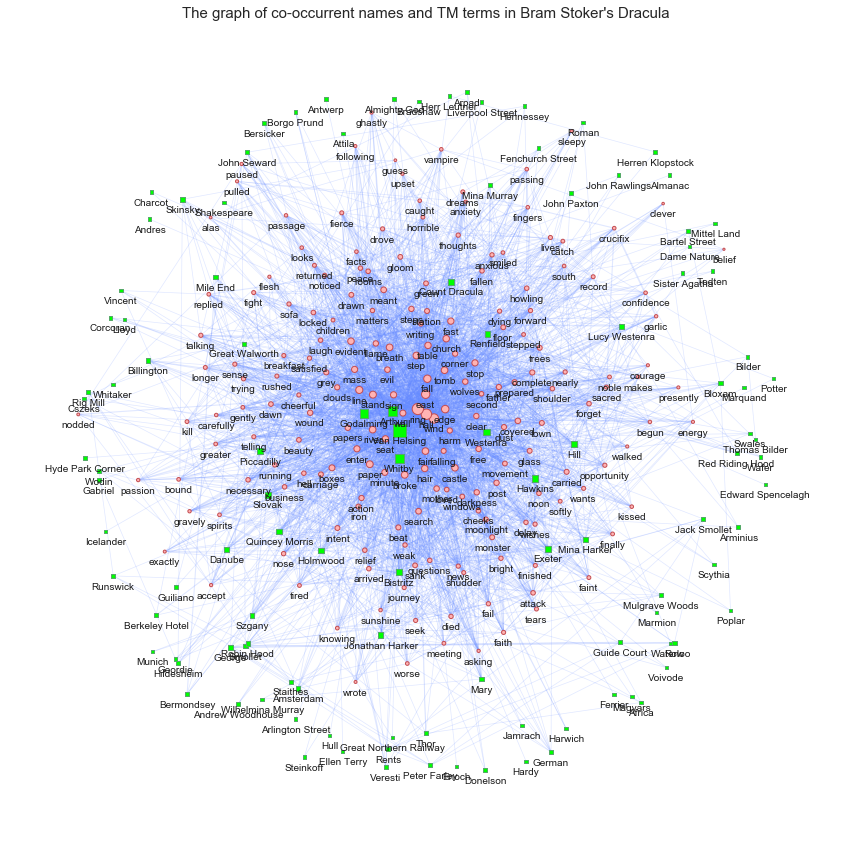

In [32]:
# typen={}
# for n in list(Gw.nodes()):
#     if n in pnn:
#         typen[n]="lime"
#     else:
#         typen[n]="#ffb3b3"

edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
# elabels = nx.get_edge_attributes(Gw,'weight')
edge_width=[math.log(1+w) for w in edge_width]
# [3*w for w in edge_width] 
nsi1=[Gw.degree(n)+10 for n in Gw.nodes() if n in pnn]
nsi2=[0.8*Gw.degree(n) for n in Gw.nodes() if n in trn]

figsize=(15,15)
pos=nx.spring_layout(Gw,k=0.95) #graphviz_layout(Gw) 
# node_color="#ffb3b3"
# node_border_color="r"
edge_color="#668cff"
G=Gw
plt.figure(figsize=figsize);
nodes1 = nx.draw_networkx_nodes(G, pos, nodelist=pnn, node_color="lime",node_shape="s",node_size=nsi1)
nodes1.set_edgecolor("g")
nodes2 = nx.draw_networkx_nodes(G, pos, nodelist=trn, node_color="#ffb3b3",node_size=nsi2)
nodes2.set_edgecolor("r")
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width,alpha=0.2)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -0.03 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset,font_size=10);
sst="The graph of co-occurrent names and TM terms in %s" %titlename
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

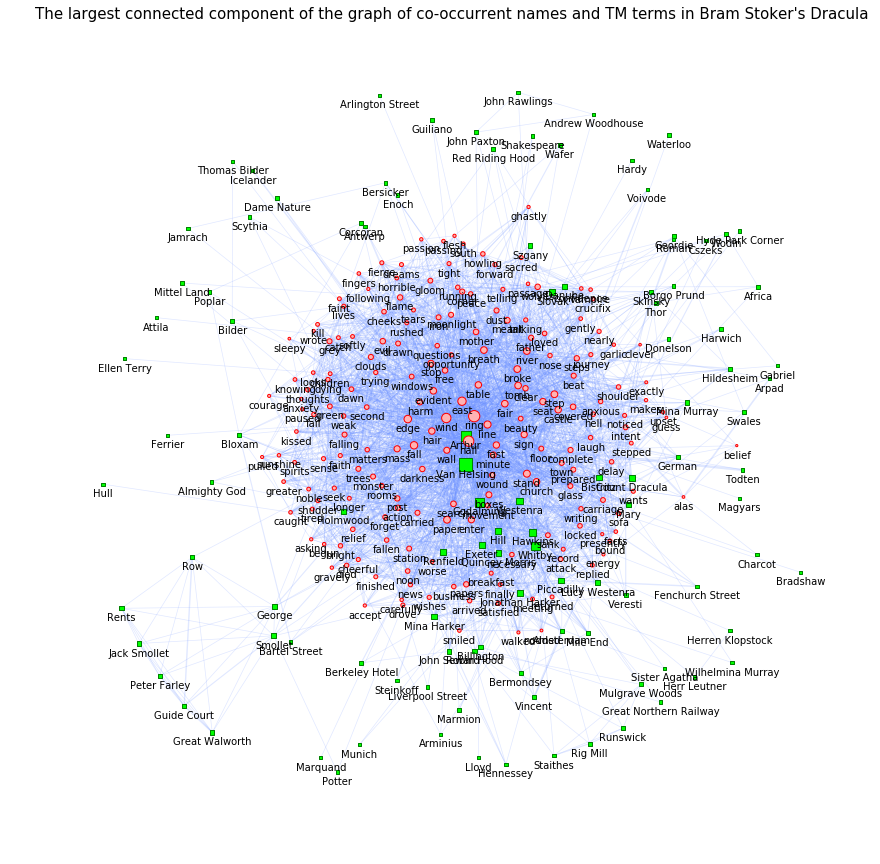

In [33]:
from IPython.display import Image
Image(filename='DraculaGraph_lcc.png')

In [34]:
# nx.write_graphml_lxml(Gc, "DraculaGraph_lcc.graphml", encoding="utf8")  

### Egocentric Subgraphs of Keywords of the Co-Occurrence Graph

In [35]:
x = dict(G.degree())
sorted_x = sorted(x.items(), key = lambda kv: kv[1], reverse=True)
for k,v in sorted_x:
    print(k,v)

ring 159
Van Helsing 152
hall 136
wind 109
east 86
Arthur 83
edge 70
fall 68
line 63
Whitby 62
Godalming 62
stand 60
paper 58
step 57
broke 56
tomb 55
river 55
breath 55
fair 54
church 53
evident 53
castle 51
table 51
hair 51
fast 50
seat 50
sign 48
stop 48
enter 47
mass 47
minute 45
wall 45
boxes 44
meant 41
search 40
evil 38
mother 38
covered 38
wolves 37
free 37
post 36
Westenra 36
papers 36
flame 36
clear 36
wound 36
darkness 36
steps 35
action 34
corner 34
harm 34
father 33
clouds 33
complete 33
dust 32
beat 32
grey 32
falling 31
prepared 31
iron 31
moonlight 31
carried 31
station 30
town 30
intent 30
trees 30
glass 30
monster 30
carriage 29
Hawkins 29
floor 29
gloom 29
drawn 29
movement 28
sank 28
windows 28
green 28
dawn 27
beauty 27
cheeks 26
attack 26
Slovak 26
rooms 26
locked 26
second 26
noon 26
forget 26
loved 26
arrived 25
Hill 25
necessary 25
business 25
hell 25
fallen 25
howling 25
questions 25
shoulder 25
relief 25
bright 24
Exeter 24
laugh 24
died 24
running 24
matters

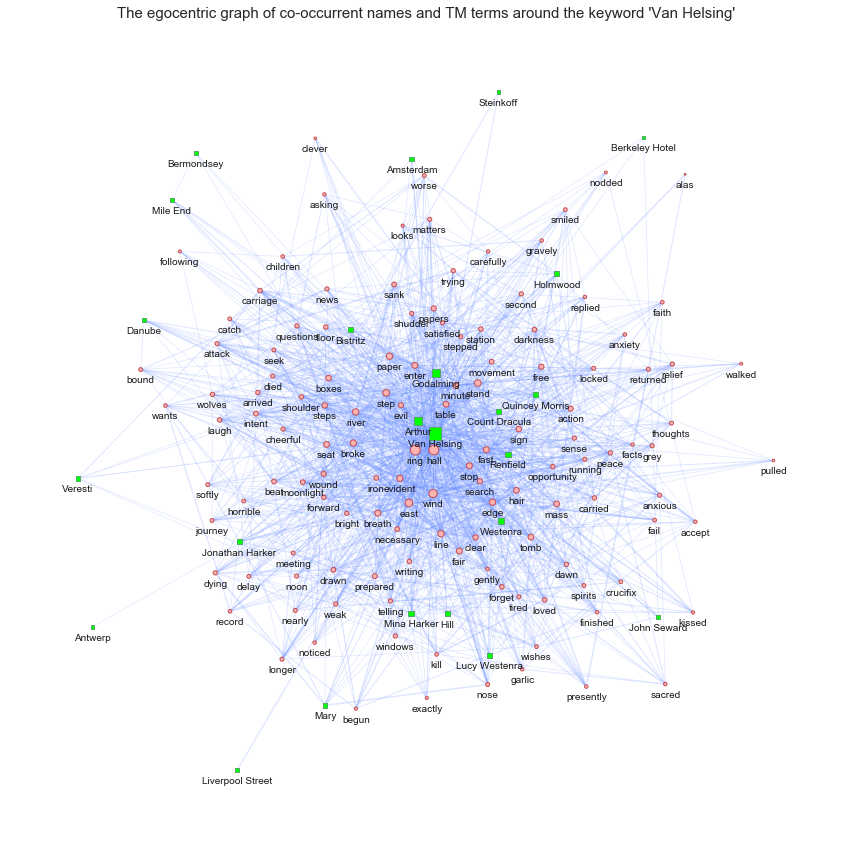

In [36]:
ego="Van Helsing"
alle=list(G.neighbors(ego))
Gego=G.subgraph(alle+[ego])

pnn=[x for x in list(Gego.nodes()) if x in names]
trn=[x for x in list(Gego.nodes()) if x not in names]

nsi1=[Gego.degree(n)+10 for n in Gego.nodes() if n in pnn]
nsi2=[1.*Gego.degree(n) for n in Gego.nodes() if n in trn]

figsize=(15,15)
pos=nx.spring_layout(Gego,k=0.95) #graphviz_layout(Gw) 
# node_color="#ffb3b3"
# node_border_color="r"
edge_color="#668cff"

plt.figure(figsize=figsize);
nodes1 = nx.draw_networkx_nodes(Gego, pos, nodelist=pnn, node_color="lime",node_shape="s",node_size=nsi1)
nodes1.set_edgecolor("g")
nodes2 = nx.draw_networkx_nodes(Gego, pos, nodelist=trn, node_color="#ffb3b3",node_size=nsi2)
nodes2.set_edgecolor("r")
nx.draw_networkx_edges(Gego, pos, edge_color=edge_color,width=edge_width,alpha=0.2)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -0.03 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gego, yoffset,font_size=10);
sst="The egocentric graph of co-occurrent names and TM terms around the keyword '%s'" %ego
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

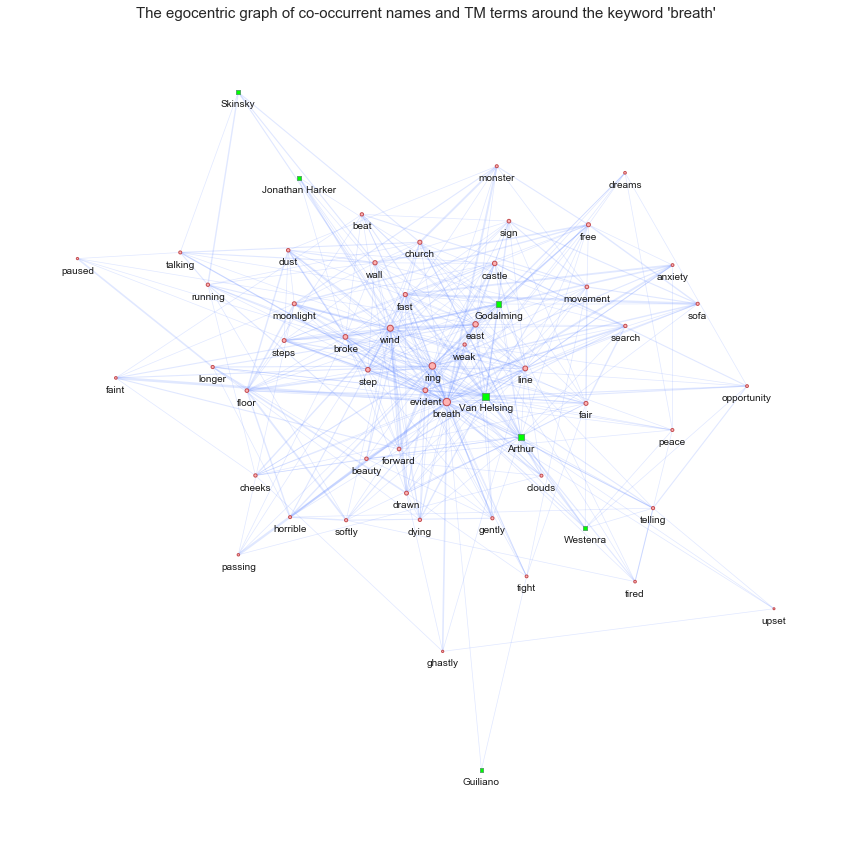

In [37]:
ego="breath"
alle=list(G.neighbors(ego))
Gego=G.subgraph(alle+[ego])

pnn=[x for x in list(Gego.nodes()) if x in names]
trn=[x for x in list(Gego.nodes()) if x not in names]

nsi1=[Gego.degree(n)+10 for n in Gego.nodes() if n in pnn]
nsi2=[1.*Gego.degree(n) for n in Gego.nodes() if n in trn]

figsize=(15,15)
pos=nx.spring_layout(Gego,k=0.95) #graphviz_layout(Gw) 
# node_color="#ffb3b3"
# node_border_color="r"
edge_color="#668cff"

plt.figure(figsize=figsize);
nodes1 = nx.draw_networkx_nodes(Gego, pos, nodelist=pnn, node_color="lime",node_shape="s",node_size=nsi1)
nodes1.set_edgecolor("g")
nodes2 = nx.draw_networkx_nodes(Gego, pos, nodelist=trn, node_color="#ffb3b3",node_size=nsi2)
nodes2.set_edgecolor("r")
nx.draw_networkx_edges(Gego, pos, edge_color=edge_color,width=edge_width,alpha=0.2)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -0.03 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gego, yoffset,font_size=10);
sst="The egocentric graph of co-occurrent names and TM terms around the keyword '%s'" %ego
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

### Clustering Keywords as Communities of the Co-Occurrence Graph

In [38]:
G=Gc

partition = community.best_partition(G)
# print partition

kk=len(set(partition.values()))
modularity=community.modularity(partition, G, weight='weight')
print('The largest connected component of the",titlename, "graph has','\n', kk, 'communities and modularity coefficient equal to', modularity)
print(" ")

cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
# ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
ocmd=sorted(cmd.items(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
louvain_comm_membership={}
for i in eocmd:
    print('Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0]),"\n")
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    louvain_comm_membership[i[0]]=ts 

The largest connected component of the",titlename, "graph has 
 7 communities and modularity coefficient equal to 0.2315723250634516
 
Community 0 with 64 nodes: ['Van Helsing', 'bright', 'Arthur', 'Berkeley Hotel', 'satisfied', 'Godalming', 'died', 'town', 'writing', 'anxious', 'Lucy Westenra', 'Mina Harker', 'Westenra', 'father', 'catch', 'opportunity', 'gently', 'returned', 'replied', 'cheerful', 'nodded', 'tired', 'second', 'worse', 'confidence', 'Mina Murray', 'forward', 'Holmwood', 'sunshine', 'wishes', 'forget', 'step', 'stepped', 'stop', 'steps', 'delay', 'Jonathan Harker', 'Quincey Morris', 'spirits', 'accept', 'looks', 'Amsterdam', 'wants', 'Hyde Park Corner', 'telling', 'gravely', 'clever', 'following', 'begun', 'peace', 'passage', 'Almighty God', 'John Seward', 'walked', 'smiled', 'Red Riding Hood', 'John Paxton', 'Wilhelmina Murray', 'Steinkoff', 'Andrew Woodhouse', 'John Rawlings', 'Hennessey', 'Lloyd', 'Antwerp'] 

Community 1 with 55 nodes: ['castle', 'nearly', 'cheeks'

In [39]:
pos0=nx.circular_layout(nx.cycle_graph(kk))

# ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
ocmd=sorted(cmd.items(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
for p,q in list(eocmd):
    if p==0:
        c1=list(list(q)[0])
    if p==1:
        c2=list(list(q)[0])
    if p==2:
        c3=list(list(q)[0])
    if p==3:
        c4=list(list(q)[0])
    if p==4:
        c5=list(list(q)[0])
    if p==5:
        c6=list(list(q)[0])
    if p==6:
        c7=list(list(q)[0])
#     if p==7:
#         c8=list(list(q)[0])
#     if p==8:
#         c9=list(list(q)[0])
#     if p==9:
#         c10=list(list(q)[0])
#     if p==10:
#         c11=list(list(q)[0])

G1=Gw.subgraph(c1)
pos1=nx.circular_layout(G1) #.spring_layout(G1,1.)

G2=Gw.subgraph(c2)
pos2=nx.circular_layout(G2) #.spring_layout(G2,1.)

G3=Gw.subgraph(c3)
pos3=nx.circular_layout(G3) #.spring_layout(G3,1.)

G4=Gw.subgraph(c4)
pos4=nx.circular_layout(G4) #.spring_layout(G1,1.)

G5=Gw.subgraph(c5)
pos5=nx.circular_layout(G5) #.spring_layout(G2,1.)

G6=Gw.subgraph(c6)
pos6=nx.circular_layout(G6) #.spring_layout(G3,1.)

G7=Gw.subgraph(c7)
pos7=nx.circular_layout(G7) #.spring_layout(G3,1.)

# G8=Gw.subgraph(c8)
# pos8=nx.circular_layout(G8) #.spring_layout(G4,1.)

# G9=Gw.subgraph(c9)
# pos9=nx.circular_layout(G9) #.spring_layout(G3,1.)

# G10=Gw.subgraph(c10)
# pos10=nx.circular_layout(G10) #.spring_layout(G4,1.)

def re_pos(pos,centre,radius):
    plist=[list(v) for v in pos.values()]
    nplist=[v for v in pos.values()]
    x = [p[0] for p in plist]
    y = [p[1] for p in plist]
    centroid = (sum(x) / float(len(plist)), sum(y) / float(len(plist)))
    ncentroid=np.array(centroid)
    rad=max([np.linalg.norm(nplist[i]-ncentroid) for i in range(len(nplist))])
    rpos={}
    for k,v in pos.items():
        rpos[k]=[(v[0]+centre[0])/float(radius),(v[1]+centre[1])/float(radius)]
    return rpos

centers=pos0.values()
centerm=[]
for i in range(len(centers)):
    t=[]
    for j in list(centers)[i]:
        t.append(5*j)  
    centerm.append(np.array(t))
centers=centerm

radius=1. #1.5
pos1=re_pos(pos1,centers[0],0.4*radius)  
pos2=re_pos(pos2,centers[1],0.45*radius)    
pos3=re_pos(pos3,centers[2],0.5*radius) 
pos4=re_pos(pos4,centers[3],0.75*radius)
pos5=re_pos(pos5,centers[4],1.0*radius)    
pos6=re_pos(pos6,centers[5],1.25*radius) 
pos7=re_pos(pos7,centers[6],1.5*radius)
# pos8=re_pos(pos8,centers[7],1.75*radius)    
# pos9=re_pos(pos9,centers[8],2*radius) 
# pos10=re_pos(pos10,centers[9],2*radius)

posAll=dict(list(pos1.items())+list(pos2.items())+list(pos3.items())+list(pos4.items())+list(pos5.items())+list(pos6.items())+list(pos7.items())+[(k,pos1[k]+pos2[k]+pos3[k]+pos4[k]+pos5[k]+pos6[k]+pos7[k]) for k in set(pos7)&set(pos6)&set(pos5)&set(pos4)&set(pos3)&set(pos2)&set(pos1)])
# +list(pos9.items())+list(pos10.items())
# +pos9[k]+pos10[k]
# set(pos10)&set(pos9)&
# +list(pos10.items())
# +pos10[k]
# set(pos10)&

# +list(pos7.items())
# +pos7[k]
# set(pos7)&

# posAll=dict(pos1.items()+pos2.items()+[(k,pos1[k]+pos2[k]) for k in set(pos2)&set(pos1)])
# posAll=dict(pos1.items()+pos2.items()+pos3.items()+[(k,pos1[k]+pos2[k]+pos3[k]) for k in set(pos3)&set(pos2)&set(pos1)])
# posAll=dict(list(pos1.items())+list(pos2.items())+list(pos3.items())+[(k,pos1[k]+pos2[k]+pos3[k]) for k in set(pos3)&set(pos2)&set(pos1)])
# posAll=dict(pos1.items()+pos2.items()+pos3.items()+pos4.items()+[(k,pos1[k]+pos2[k]+pos3[k]+pos4[k]) for k in set(pos4)&set(pos3)&set(pos2)&set(pos1)])
# posAll=dict(pos1.items()+pos2.items()+pos3.items()+pos4.items()+posR.items()+[(k,pos1[k]+pos2[k]+pos3[k]+pos4[k]+posR[k]) for k in set(posR)&set(pos4)&set(pos3)&set(pos2)&set(pos1)])

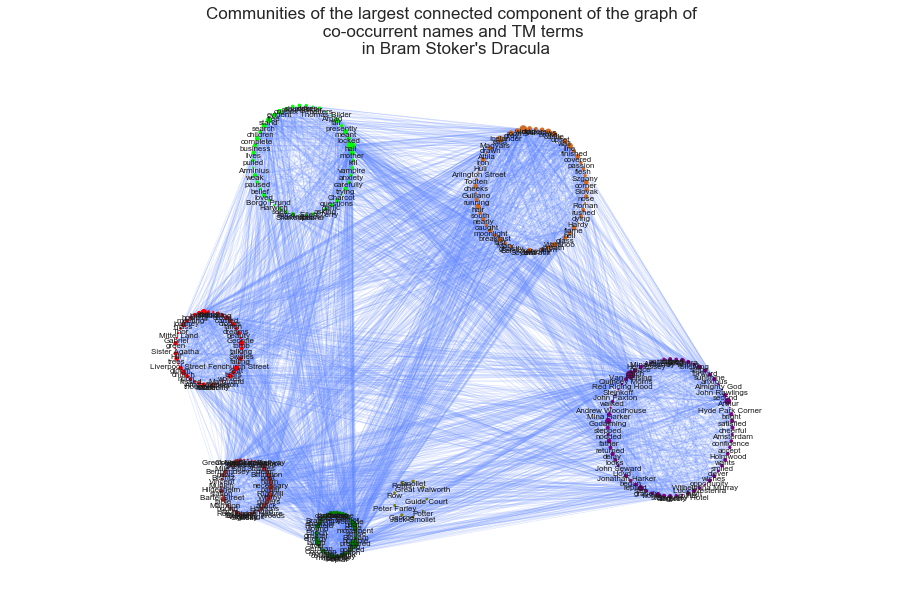

In [40]:
plt.figure(figsize=(16,10))

Gw=Gc

nsi1=[0.4*Gw.degree(n) for n in Gw.nodes() if n in c1]
nsi2=[0.4*Gw.degree(n) for n in Gw.nodes() if n in c2]
nsi3=[0.4*Gw.degree(n) for n in Gw.nodes() if n in c3]
nsi4=[0.4*Gw.degree(n) for n in Gw.nodes() if n in c4]
nsi5=[0.4*Gw.degree(n) for n in Gw.nodes() if n in c5]
nsi6=[0.4*Gw.degree(n) for n in Gw.nodes() if n in c6]
nsi7=[0.4*Gw.degree(n) for n in Gw.nodes() if n in c7]
# nsi8=[0.4*Gw.degree(n) for n in Gw.nodes() if n in c8]
# nsi9=[0.4*Gw.degree(n) for n in Gw.nodes() if n in c9]
# nsi10=[2.4*Gw.degree(n) for n in Gw.nodes() if n in c10]

nx.draw_networkx_nodes(G1,pos=pos1,node_size=nsi1,nodelist=c1,node_color='purple',alpha=1.);
nx.draw_networkx_nodes(G2,pos=pos2,node_size=nsi2,nodelist=c2,node_color='chocolate',alpha=1.);
nx.draw_networkx_nodes(G3,pos=pos3,node_size=nsi3,nodelist=c3,node_color='lime',alpha=1.);
nx.draw_networkx_nodes(G4,pos=pos4,node_size=nsi4,nodelist=c4,node_color='red',alpha=1.);
nx.draw_networkx_nodes(G5,pos=pos5,node_size=nsi5,nodelist=c5,node_color='brown',alpha=1.);
nx.draw_networkx_nodes(G6,pos=pos6,node_size=nsi6,nodelist=c6,node_color='green',alpha=1.);
nx.draw_networkx_nodes(G7,pos=pos7,node_size=nsi7,nodelist=c7,node_color='olive',alpha=1.);
# nx.draw_networkx_nodes(G8,pos=pos8,node_size=nsi8,nodelist=c8,node_color='magenta',alpha=1.);
# nx.draw_networkx_nodes(G9,pos=pos9,node_size=nsi9,nodelist=c9,node_color='cyan',alpha=1.);
# nx.draw_networkx_nodes(G10,pos=pos10,node_size=nsi10,nodelist=c10,node_color='orange',alpha=1.);

# nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, posAll, edge_color=edge_color,width=edge_width,alpha=0.2)

plt.axis('off');
yoffset = {}
y_off = -0.08 # offset on the y axis
for k, v in posAll.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset, font_size=8);
sst="Communities of the largest connected component of the graph of \n co-occurrent names and TM terms \n in %s" %titlename 
plt.title(sst,fontsize=17);
plt.margins(x=0.3, y=0.1) 

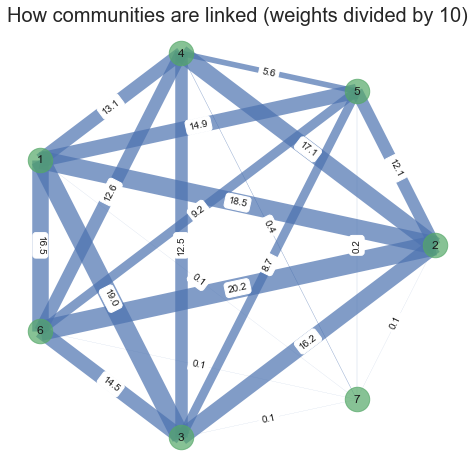

In [41]:
e12,e13,e14,e15,e16,e17,e23,e24,e25,e26,e27,e34,e35,e36,e37,e45,e46,e47,e56,e57,e67=0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gi = nx.Graph()
s=0.1
for e in Gw.edges():
    if (e[0] in c1 and e[1] in c2) or (e[1] in c1 and e[0] in c2):
        e12+=1
        Gi.add_edge(1,2,weight=round(s*e12,1))
    if (e[0] in c1 and e[1] in c3) or (e[1] in c1 and e[0] in c3):
        e13+=1
        Gi.add_edge(1,3,weight=round(s*e13,1))
    if (e[0] in c1 and e[1] in c4) or (e[1] in c1 and e[0] in c4):
        e14+=1
        Gi.add_edge(1,4,weight=round(s*e14,1))
    if (e[0] in c1 and e[1] in c5) or (e[1] in c1 and e[0] in c5):
        e15+=1
        Gi.add_edge(1,5,weight=round(s*e15,1))
    if (e[0] in c1 and e[1] in c6) or (e[1] in c1 and e[0] in c6):
        e16+=1
        Gi.add_edge(1,6,weight=round(s*e16,1))
    if (e[0] in c1 and e[1] in c7) or (e[1] in c1 and e[0] in c7):
        e17+=1
        Gi.add_edge(1,7,weight=round(s*e17,1))
    if (e[0] in c2 and e[1] in c3) or (e[1] in c2 and e[0] in c3):
        e23+=1
        Gi.add_edge(2,3,weight=round(s*e23,1))
    if (e[0] in c2 and e[1] in c4) or (e[1] in c2 and e[0] in c4):
        e24+=1
        Gi.add_edge(2,4,weight=round(s*e24,1))
    if (e[0] in c2 and e[1] in c5) or (e[1] in c2 and e[0] in c5):
        e25+=1
        Gi.add_edge(2,5,weight=round(s*e25,1))
    if (e[0] in c2 and e[1] in c6) or (e[1] in c2 and e[0] in c6):
        e26+=1
        Gi.add_edge(2,6,weight=round(s*e26,1))
    if (e[0] in c2 and e[1] in c7) or (e[1] in c2 and e[0] in c7):
        e27+=1
        Gi.add_edge(2,7,weight=round(s*e27,1))
    if (e[0] in c3 and e[1] in c4) or (e[1] in c3 and e[0] in c4):
        e34+=1
        Gi.add_edge(3,4,weight=round(s*e34,1))
    if (e[0] in c3 and e[1] in c5) or (e[1] in c3 and e[0] in c5):
        e35+=1
        Gi.add_edge(3,5,weight=round(s*e35,1))
    if (e[0] in c3 and e[1] in c6) or (e[1] in c3 and e[0] in c6):
        e36+=1
        Gi.add_edge(3,6,weight=round(s*e36,1))
    if (e[0] in c3 and e[1] in c7) or (e[1] in c3 and e[0] in c7):
        e37+=1
        Gi.add_edge(3,7,weight=round(s*e37,1))
    if (e[0] in c4 and e[1] in c5) or (e[1] in c4 and e[0] in c5):
        e45+=1
        Gi.add_edge(4,5,weight=round(s*e45,1))
    if (e[0] in c4 and e[1] in c6) or (e[1] in c4 and e[0] in c6):
        e46+=1
        Gi.add_edge(4,6,weight=round(s*e46,1))
    if (e[0] in c4 and e[1] in c7) or (e[1] in c4 and e[0] in c7):
        e47+=1
        Gi.add_edge(4,7,weight=round(s*e47,1))
    if (e[0] in c5 and e[1] in c6) or (e[1] in c5 and e[0] in c6):
        e56+=1
        Gi.add_edge(5,6,weight=round(s*e56,1))
    if (e[0] in c5 and e[1] in c7) or (e[1] in c5 and e[0] in c7):
        e57+=1
        Gi.add_edge(5,7,weight=round(s*e57,1))
    if (e[0] in c6 and e[1] in c7) or (e[1] in c6 and e[0] in c7):
        e67+=1
        Gi.add_edge(6,7,weight=round(s*e67,1))
# print(e12,e13,e14,e15,e16,e17,e23,e24,e25,e26,e27,e34,e35,e36,e37,e45,e46,e47,e56,e57,e67)

edge_widthi=[Gi[u][v]['weight'] for u,v in Gi.edges()] 
edge_widthi=[w for w in edge_widthi]

elabels = nx.get_edge_attributes(Gi,'weight')
# print(elabels)

pos=nx.circular_layout(Gi)
# nx.spring_layout(Gi,k=8.,iterations=20) #graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(Gi, pos, node_color="g", node_size=600,alpha=0.7)
nx.draw_networkx_edges(Gi, pos,arrowsize=20, width=edge_widthi, edge_color="b",alpha=0.7)
nx.draw_networkx_labels(Gi, pos)
nx.draw_networkx_edge_labels(Gi,pos,edge_labels=elabels)
plt.axis('off');
plt.title("How communities are linked (weights divided by 10)",fontsize=20);

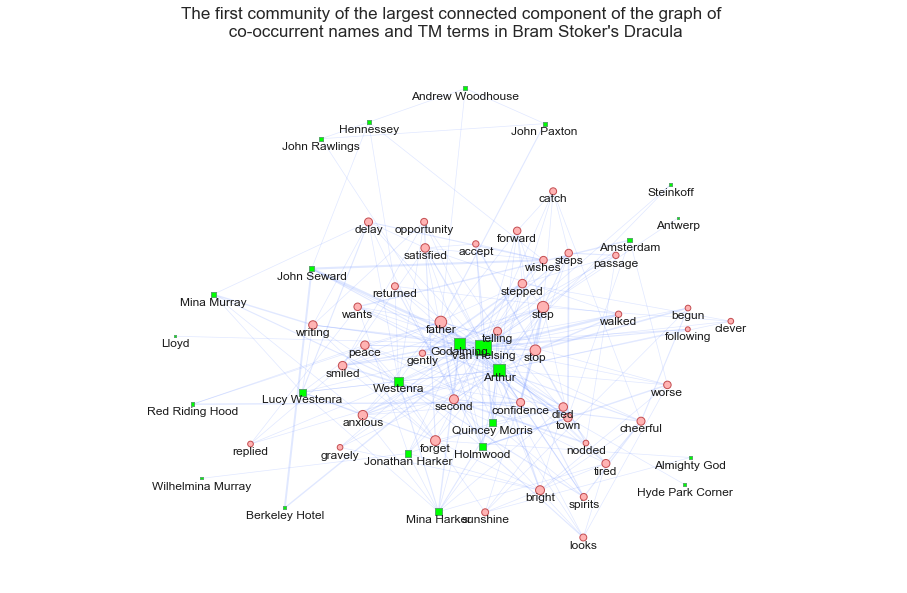

In [42]:
G = nx.MultiGraph()
G.add_edges_from(medges)

weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)

pnn=[x for x in list(Gw.nodes()) if x in names]
trn=[x for x in list(Gw.nodes()) if x not in names]

plt.figure(figsize=(16,10))

pos1=nx.spring_layout(G1,1.)
pnn=[x for x in list(G1.nodes()) if x in names]
trn=[x for x in list(G1.nodes()) if x not in names]
nsi1=[5*G1.degree(n) for n in G1.nodes() if n in pnn]
nsi2=[8*G1.degree(n) for n in G1.nodes() if n in trn]
nodes1 = nx.draw_networkx_nodes(G1, pos=pos1, nodelist=pnn, node_color="lime",node_shape="s",node_size=nsi1)
nodes1.set_edgecolor("g")
nodes2 = nx.draw_networkx_nodes(G1, pos=pos1, nodelist=trn, node_color="#ffb3b3",node_size=nsi2)
nodes2.set_edgecolor("r")
# nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G1, pos1, edge_color=edge_color,width=edge_width,alpha=0.2)

plt.axis('off');
yoffset = {}
y_off = -0.03 # offset on the y axis
for k, v in pos1.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G1, yoffset, font_size=12);
sst="The first community of the largest connected component of the graph of \n co-occurrent names and TM terms in %s" %titlename 
plt.title(sst,fontsize=17);
plt.margins(x=0.3, y=0.1) 

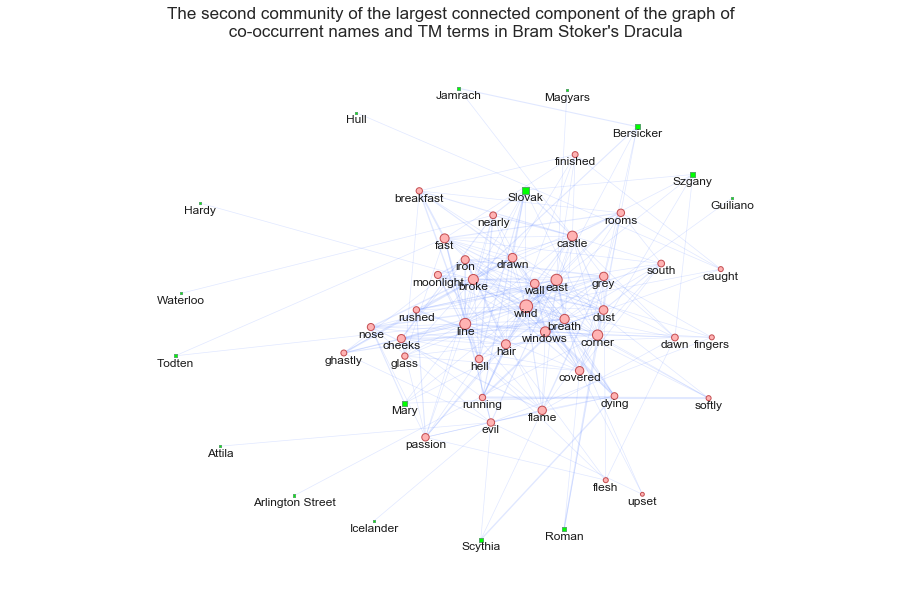

In [43]:
plt.figure(figsize=(16,10))

G1=G2

pos1=nx.spring_layout(G1,1.)
pnn=[x for x in list(G1.nodes()) if x in names]
trn=[x for x in list(G1.nodes()) if x not in names]
nsi1=[5*G1.degree(n) for n in G1.nodes() if n in pnn]
nsi2=[5*G1.degree(n) for n in G1.nodes() if n in trn]
nodes1 = nx.draw_networkx_nodes(G1, pos=pos1, nodelist=pnn, node_color="lime",node_shape="s",node_size=nsi1)
nodes1.set_edgecolor("g")
nodes2 = nx.draw_networkx_nodes(G1, pos=pos1, nodelist=trn, node_color="#ffb3b3",node_size=nsi2)
nodes2.set_edgecolor("r")
# nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G1, pos1, edge_color=edge_color,width=edge_width,alpha=0.2)

plt.axis('off');
yoffset = {}
y_off = -0.03 # offset on the y axis
for k, v in pos1.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G1, yoffset, font_size=12);
sst="The second community of the largest connected component of the graph of \n co-occurrent names and TM terms in %s" %titlename 
plt.title(sst,fontsize=17);
plt.margins(x=0.3, y=0.1) 

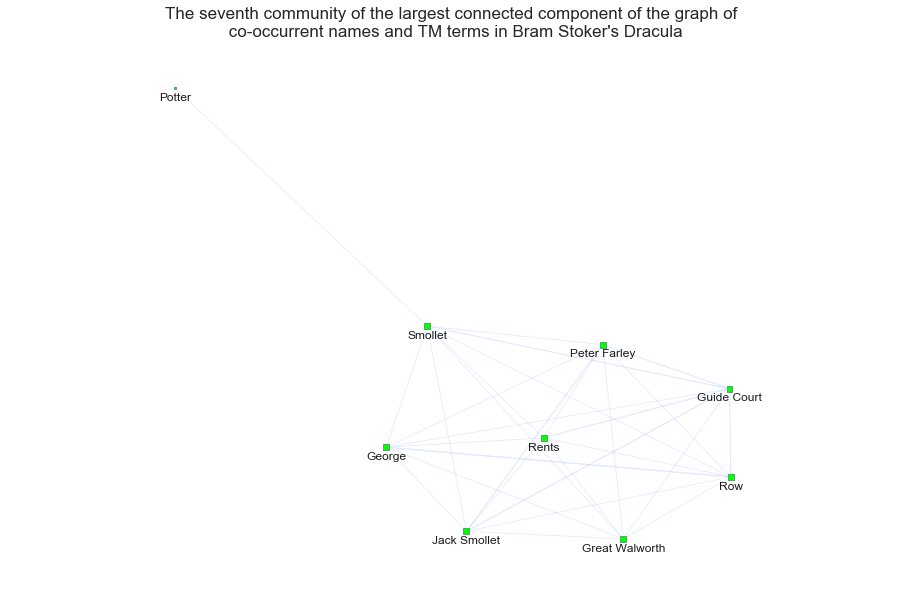

In [44]:
plt.figure(figsize=(16,10))

G1=G7

pos1=nx.spring_layout(G1,1.)
pnn=[x for x in list(G1.nodes()) if x in names]
trn=[x for x in list(G1.nodes()) if x not in names]
nsi1=[5*G1.degree(n) for n in G1.nodes() if n in pnn]
nsi2=[0.8*G1.degree(n) for n in G1.nodes() if n in trn]
nodes1 = nx.draw_networkx_nodes(G1, pos=pos1, nodelist=pnn, node_color="lime",node_shape="s",node_size=nsi1)
nodes1.set_edgecolor("g")
nodes2 = nx.draw_networkx_nodes(G1, pos=pos1, nodelist=trn, node_color="#ffb3b3",node_size=nsi2)
# nodes2.set_edgecolor("r")
# nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G1, pos1, edge_color=edge_color,width=edge_width,alpha=0.2)

plt.axis('off');
yoffset = {}
y_off = -0.03 # offset on the y axis
for k, v in pos1.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G1, yoffset, font_size=12);
sst="The seventh community of the largest connected component of the graph of \n co-occurrent names and TM terms in %s" %titlename 
plt.title(sst,fontsize=17);
plt.margins(x=0.3, y=0.1) 

In [45]:
# plt.figure(figsize=(16,10))

# G1=G8

# pos1=nx.spring_layout(G1,1.)
# pnn=[x for x in list(G1.nodes()) if x in names]
# trn=[x for x in list(G1.nodes()) if x not in names]
# nsi1=[5*G1.degree(n) for n in G1.nodes() if n in pnn]
# nsi2=[0.8*G1.degree(n) for n in G1.nodes() if n in trn]
# nodes1 = nx.draw_networkx_nodes(G1, pos=pos1, nodelist=pnn, node_color="lime",node_shape="s",node_size=nsi1)
# nodes1.set_edgecolor("g")
# # nodes2 = nx.draw_networkx_nodes(G1, pos=pos1, nodelist=trn, node_color="#ffb3b3",node_size=nsi2)
# # nodes2.set_edgecolor("r")
# # nodes.set_edgecolor(node_border_color)
# nx.draw_networkx_edges(G1, pos1, edge_color=edge_color,width=edge_width,alpha=0.2)

# plt.axis('off');
# yoffset = {}
# y_off = -0.03 # offset on the y axis
# for k, v in pos1.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(G1, yoffset, font_size=12);
# sst="The eigth community of the largest connected component of the graph of \n co-occurrent names and TM terms in %s" %titlename 
# plt.title(sst,fontsize=17);
# plt.margins(x=0.3, y=0.1) 